# Titanic Machine Learning from Disaster

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
train_filename = 'train.csv'
train_df = pd.read_csv(train_filename)
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Shape of data input
print(train_df.shape)

(891, 12)


In [4]:
# Info of data input
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Let see where there are Null values
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
# Tenemos que el sexo esta como una variable tipo string y no podemos operar con ella en los algoritmos
sexo = {'male': 0, 'female':1}
train_df['Sex'] = train_df['Sex'].map(sexo)
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [7]:
# Hallemos la correlacion entre las variables
corr_matrix = train_df.corr(method='pearson')
print(corr_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.369226  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.093254  0.114631   
Age             0.036847 -0.077221 -0.369226 -0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

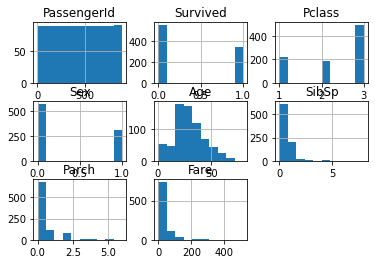

In [8]:
# Antes de cambiar los datos de entrada vamos a visulizar los datos que tenemos
# Histograma
train_df.hist(sharex=False, sharey=False)
plt.show()

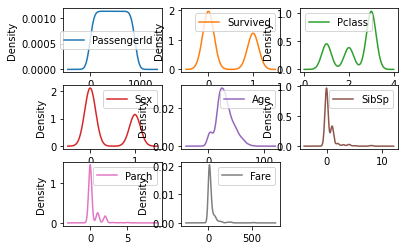

In [9]:
# Densidad
train_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

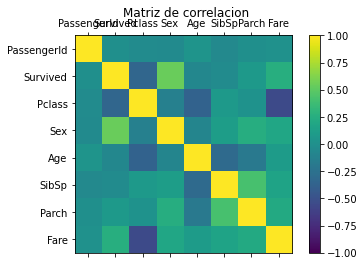

In [10]:
# Matriz de correlacion
fig = plt.figure()
fig.suptitle("Matriz de correlacion")
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
names = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Fill missing data

In [11]:
# Vamos a rellenar los datos en la edad que falta
age_arr = train_df['Age'].values
print("Total data: %d" % len(age_arr))
print("Null data: %d (%f%%)" % (np.sum(np.isnan(age_arr)), np.sum(np.isnan(age_arr))/len(age_arr) * 100))

Total data: 891
Null data: 177 (19.865320%)


In [12]:
# No podemos eliminar la variable pues hay un deficit del 20% de los datos
mean_age = np.nanmean(age_arr)
print("La edad media de los pasajeros es de %f" % mean_age)

La edad media de los pasajeros es de 29.699118


In [13]:
# Vamos a rellenar los valores faltantes
train_df['Age'] = train_df['Age'].fillna(mean_age)
print(train_df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [14]:
# Vamos a rellenar los datos en 'Cabin' que faltan
cabin_arr = train_df['Cabin'].values
print("Total data: %d" % len(cabin_arr))
print("Null data: %d (%f%%)" % (np.sum(pd.isna(cabin_arr)), (np.sum(pd.isna(cabin_arr))/len(cabin_arr))*100))

Total data: 891
Null data: 687 (77.104377%)


In [15]:
# La columna 'Cabin' podemos desecharla pues faltan demasiados datos 
train_df.drop('Cabin', inplace=True, axis=1)

In [16]:
print(train_df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


In [17]:
print(train_df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool


In [18]:
# Veamos que pasa con la variable 'Embarked'
emb_arr = train_df['Embarked'].values
print("Total data: %d" % len(emb_arr))
print("Null data: %d (%f%%)" % (np.sum(pd.isna(emb_arr)), (np.sum(pd.isna(emb_arr)/len(emb_arr))*100)))

Total data: 891
Null data: 2 (0.224467%)


In [19]:
values = set(emb_arr)
print(values)

{nan, 'C', 'Q', 'S'}


In [20]:
# Vamos a calcular las frecuencias de cada uno
frec_C = np.sum(emb_arr == 'C')
frec_Q = np.sum(emb_arr == 'Q')
frec_S = np.sum(emb_arr == 'S')
print("Frecuencias:\nC: %d Q: %d S: %d" % (frec_C, frec_Q, frec_S))

Frecuencias:
C: 168 Q: 77 S: 644


In [21]:
# Vamos a rellenar los datos que faltan 
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [22]:
print(train_df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool


## Visualizacion de los datos arreglados

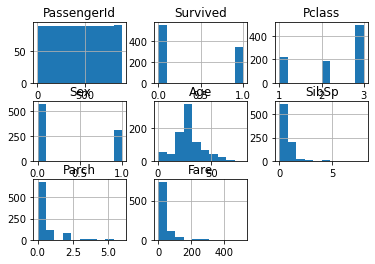

In [23]:
# Histograma
train_df.hist(sharex=False, sharey=False)
plt.show()

In [24]:
# Hallemos la correlacion entre las variables
corr_matrix = train_df.corr(method='pearson')
print(corr_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.331339  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.084153  0.114631   
Age             0.033207 -0.069809 -0.331339 -0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.091566  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.179191  0.091566  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

## Evaluate algorithms

### Dividamos las variables de los datos de la variable objetivo

In [25]:
X = train_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
Y = train_df['Survived'].values

### Test harness

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Build Models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Spot-check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

In [30]:
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.796866 (0.035983)
CART: 0.744195 (0.042474)
KNN: 0.637403 (0.049466)
LDA: 0.790150 (0.043961)
GNB: 0.782247 (0.045640)
SVC: 0.659888 (0.063774)


### Select the best model

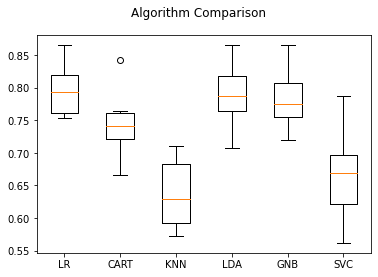

In [31]:
# Compare algoritms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predictions

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
# Import test dataset
test_filename = 'test.csv'
test_df = pd.read_csv(test_filename)
print(test_df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [42]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


Para que coincidan los datasets de entrenamiento y de prueba vamos a cambiar los el conjunto de prueba de la siguiente forma

In [43]:
# Veamos si hay algun dato que falte
print(test_df.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
# Hagamos las mismas transformaciones que habiamos hecho antes
sexo = {'male': 0, 'female':1}
test_df['Sex'] = test_df['Sex'].map(sexo)

In [47]:
# Vamos a rellenar los valores faltantes
test_df['Age'] = test_df['Age'].fillna(mean_age)

In [49]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [50]:
# La columna 'Cabin' podemos desecharla pues faltan demasiados datos 
test_df.drop('Cabin', inplace=True, axis=1)

In [51]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Embarked       False
dtype: bool

In [55]:
# Vamos a llenar los valores en la variable Fare que faltan
fare_mean = np.nanmean(test_df['Fare'].values)
test_df['Fare'] = test_df['Fare'].fillna(fare_mean)

In [56]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [57]:
# Definimos el dataset de prueba
X_test = test_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values

In [58]:
# Definimos nuestro modelo
lrm = LogisticRegression()
lrm.fit(X, Y)
predictions = lrm.predict(X_test)

## Compute accuracy

In [63]:
gender_sub = pd.read_csv('gender_submission.csv')
print(gender_sub.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [65]:
print("Accuracy score: ")
print(accuracy_score(gender_sub['Survived'], predictions))

Accuracy score: 
0.930622009569378


In [66]:
print("Confusion matrix: ")
print(confusion_matrix(gender_sub['Survived'], predictions))

Confusion matrix: 
[[246  20]
 [  9 143]]


In [67]:
print("Classification report: ")
print(classification_report(gender_sub['Survived'], predictions))

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       266
           1       0.88      0.94      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



## Save my predictions

In [71]:
my_predict = pd.DataFrame()
my_predict['PassengerId'] = gender_sub['PassengerId']
my_predict['Survived'] = predictions

In [76]:
# Salvamos mis predicciones
my_predict.to_csv('my_predictions.csv', index=False)